In [4]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [23]:

import pandas as pd
import os
df = pd.read_csv('C:/Users/Admin/Desktop/datascience/cars_ds_final.csv')
row = df[df['Make'] == 'Tata']
print(row)


      Unnamed: 0  Make      Model                Variant Ex-Showroom_Price  \
0              0  Tata  Nano Genx                     Xt      Rs. 2,92,667   
1              1  Tata  Nano Genx                     Xe      Rs. 2,36,447   
2              2  Tata  Nano Genx                Emax Xm      Rs. 2,96,661   
3              3  Tata  Nano Genx                    Xta      Rs. 3,34,768   
4              4  Tata  Nano Genx                     Xm      Rs. 2,72,223   
...          ...   ...        ...                    ...               ...   
1141        1141  Tata    Harrier  Revotorq Dark Edition     Rs. 17,30,755   
1187        1187  Tata  Tiago Nrg          1.2L Revotron      Rs. 5,94,993   
1188        1188  Tata  Tiago Nrg         1.05L Revotorq      Rs. 6,89,993   
1189        1189  Tata  Tiago Nrg      1.2L Revotron Amt      Rs. 6,39,993   
1204        1204  Tata     Winger                    15S     Rs. 12,05,000   

     Displacement  Cylinders  Valves_Per_Cylinder              

In [29]:
# Check for missing values
missing_data = row.isnull().sum()

# Drop rows with missing price or key columns (optional)
cleaned_data = row.dropna(subset=['Ex-Showroom_Price'])

# Remove currency symbols from the price and convert to numeric
cleaned_data['Ex-Showroom_Price'] = cleaned_data['Ex-Showroom_Price'].str.replace('Rs. ', '').str.replace(',', '').astype(float)

cleaned_data.head()


,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,292667.0,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,236447.0,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,296661.0,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,334768.0,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,272223.0,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Descriptive statistics for numerical columns
price_stats = cleaned_data['Ex-Showroom_Price'].describe()

# Calculate the mean engine displacement
mean_displacement = cleaned_data['Displacement'].str.replace(' cc', '').astype(float).mean()

print(f"Price statistics: \n{price_stats}")
print(f"Mean engine displacement: {mean_displacement:.2f} cc")


Price statistics: 
count    1.000000e+02
mean     9.371146e+05
std      3.975465e+05
min      2.364470e+05
25%      6.584815e+05
50%      8.401600e+05
75%      1.165000e+06
max      1.929417e+06
Name: Ex-Showroom_Price, dtype: float64
Mean engine displacement: 1393.32 cc


In [33]:
# Find the variant with the highest and lowest price
highest_price_variant = cleaned_data.loc[cleaned_data['Ex-Showroom_Price'].idxmax()]
lowest_price_variant = cleaned_data.loc[cleaned_data['Ex-Showroom_Price'].idxmin()]

print(f"Highest price variant:\n{highest_price_variant}")
print(f"Lowest price variant:\n{lowest_price_variant}")


Highest price variant:
Unnamed: 0                 691
Make                      Tata
Model                     Hexa
Variant                 Xt 4X4
Ex-Showroom_Price    1929417.0
                       ...    
USB_Ports                  NaN
Heads-Up_Display           NaN
Welcome_Lights             NaN
Battery                    NaN
Electric_Range             NaN
Name: 691, Length: 141, dtype: object
Lowest price variant:
Unnamed: 0                   1
Make                      Tata
Model                Nano Genx
Variant                     Xe
Ex-Showroom_Price     236447.0
                       ...    
USB_Ports                  NaN
Heads-Up_Display           NaN
Welcome_Lights             NaN
Battery                    NaN
Electric_Range             NaN
Name: 1, Length: 141, dtype: object


Matplotlib is building the font cache; this may take a moment.


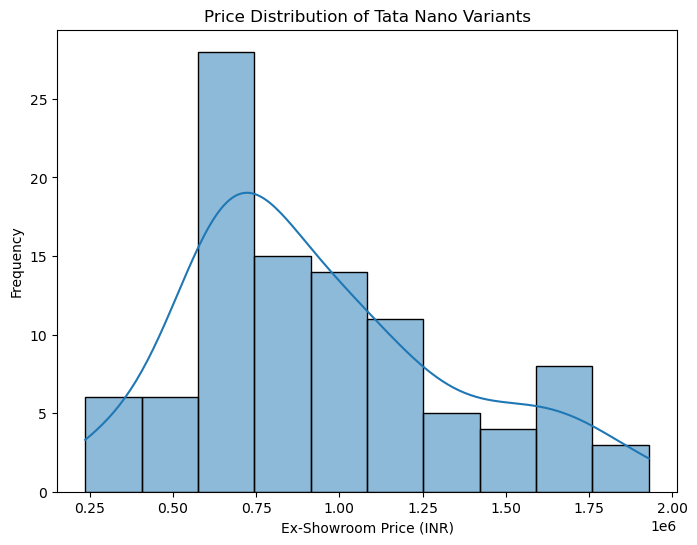

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot price distribution
plt.figure(figsize=(8,6))
sns.histplot(cleaned_data['Ex-Showroom_Price'], bins=10, kde=True)
plt.title('Price Distribution of Tata Nano Variants')
plt.xlabel('Ex-Showroom Price (INR)')
plt.ylabel('Frequency')
plt.show()


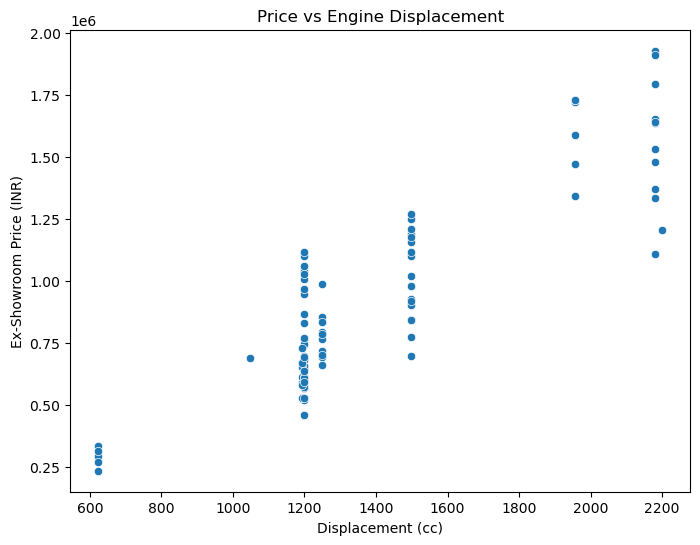

In [37]:
# Convert Displacement to numeric
cleaned_data['Displacement'] = cleaned_data['Displacement'].str.replace(' cc', '').astype(float)

# Scatter plot to examine relationship between price and engine displacement
plt.figure(figsize=(8,6))
sns.scatterplot(x='Displacement', y='Ex-Showroom_Price', data=cleaned_data)
plt.title('Price vs Engine Displacement')
plt.xlabel('Displacement (cc)')
plt.ylabel('Ex-Showroom Price (INR)')
plt.show()


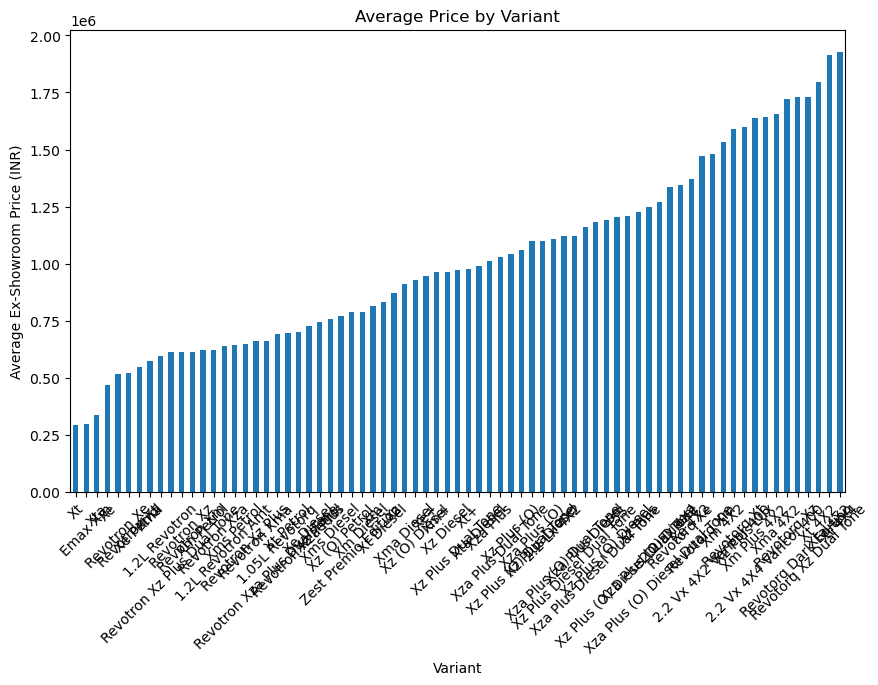

In [39]:
# Group by Variant and calculate average price
avg_price_by_variant = cleaned_data.groupby('Variant')['Ex-Showroom_Price'].mean().sort_values()

# Bar plot for average price per variant
plt.figure(figsize=(10,6))
avg_price_by_variant.plot(kind='bar')
plt.title('Average Price by Variant')
plt.xlabel('Variant')
plt.ylabel('Average Ex-Showroom Price (INR)')
plt.xticks(rotation=45)
plt.show()


In [41]:
# Check which variants have cruise control
variants_with_cruise_control = cleaned_data[cleaned_data['Cruise_Control'].notnull()]

print("Variants with Cruise Control:")
print(variants_with_cruise_control[['Make', 'Model', 'Variant', 'Cruise_Control']])


Variants with Cruise Control:
     Make   Model        Variant Cruise_Control
432  Tata  Altroz      Xt Petrol            Yes
433  Tata  Altroz      Xz Petrol            Yes
434  Tata  Altroz  Xz (O) Petrol            Yes
437  Tata  Altroz      Xt Diesel            Yes
438  Tata  Altroz      Xz Diesel            Yes
439  Tata  Altroz  Xz (O) Diesel            Yes
691  Tata    Hexa         Xt 4X4            Yes
692  Tata    Hexa        Xta 4X2            Yes
693  Tata    Hexa         Xt 4X2            Yes


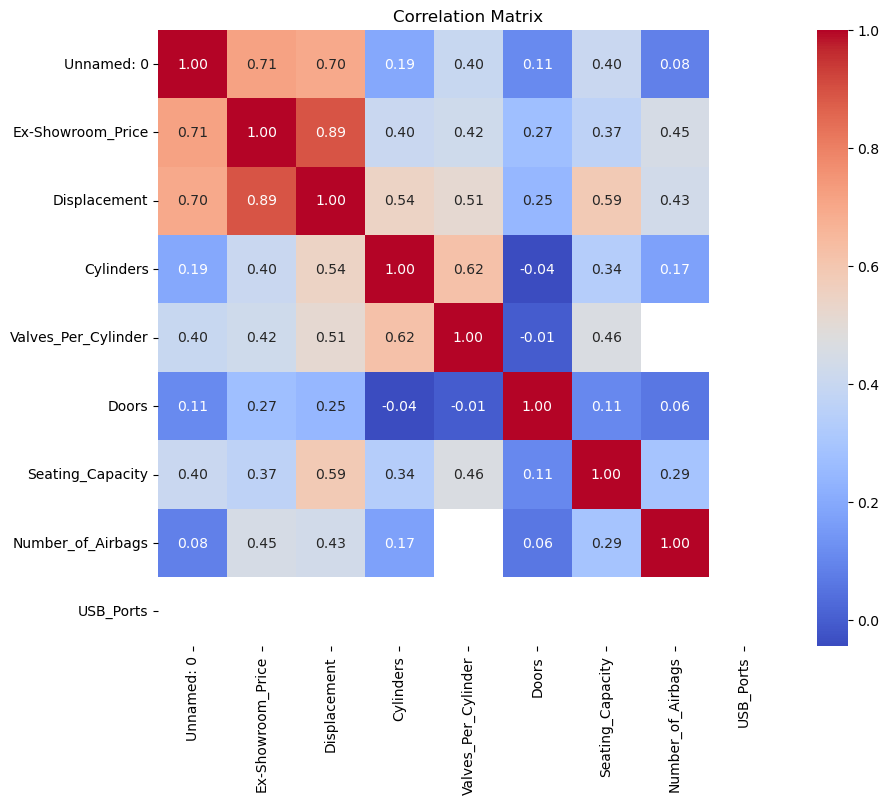

In [47]:
# Convert all values in 'Ex-Showroom_Price' and 'Displacement' to strings first
cleaned_data['Ex-Showroom_Price'] = cleaned_data['Ex-Showroom_Price'].astype(str)
cleaned_data['Displacement'] = cleaned_data['Displacement'].astype(str)

# Remove currency symbols and commas from 'Ex-Showroom_Price' and convert to float
cleaned_data['Ex-Showroom_Price'] = cleaned_data['Ex-Showroom_Price'].str.replace('Rs. ', '').str.replace(',', '').astype(float)

# Remove ' cc' from 'Displacement' and convert to float
cleaned_data['Displacement'] = cleaned_data['Displacement'].str.replace(' cc', '').astype(float)

# Select only numeric columns for correlation matrix
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
